In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime 

from scripts.fetch_treasuries import multi_download_year_treasury_par_yield_curve_rate
from scripts.utils import run_pca_yield_curve

import nest_asyncio
nest_asyncio.apply()

from dotenv import dotenv_values
config = dotenv_values(".env")

sns.set(style="whitegrid", palette="dark")
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dir_path = r"C:\Users\chris\tactical-treasuries-treasure\data" 
years = [str(x) for x in range(2024, 1989, -1)]
ust_daily_data = multi_download_year_treasury_par_yield_curve_rate(years, dir_path, run_all=True)

In [3]:
# Treasury's official yield curve is a par yield curve derived using a monotone convex method from bid-side market price quotations
# (not actual transactions) for the most recently auctioned securities obtained by the Federal Reserve Bank of New York at or near 3:30 PM each trading day
df_par_rates = ust_daily_data["daily_treasury_yield_curve"]
df_par_rates["Date"] = pd.to_datetime(df_par_rates["Date"])

df_lt_avg_rate = ust_daily_data["daily_treasury_long_term_rate"]
df_lt_avg_rate["Date"] = pd.to_datetime(df_lt_avg_rate["Date"])

df_par_rates_lt_adj = pd.merge(df_par_rates, df_lt_avg_rate, on="Date", how="left")
df_par_rates_lt_adj["20 Yr"] = df_par_rates_lt_adj["20 Yr"].fillna(df_par_rates_lt_adj["TREASURY 20-Yr CMT"])
df_par_rates_lt_adj["30 Yr"] = np.where(
    df_par_rates_lt_adj["30 Yr"].isna(),
    df_par_rates_lt_adj["20 Yr"] + df_par_rates_lt_adj["Extrapolation Factor"],
    df_par_rates_lt_adj["30 Yr"],
)
df_par_rates_lt_adj = df_par_rates_lt_adj.drop(
    columns=["LT COMPOSITE (>10 Yrs)", "TREASURY 20-Yr CMT", "Extrapolation Factor"]
)
display(df_par_rates_lt_adj)
df_par_rates_lt_adj.describe()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-06-18,5.40,5.46,5.50,5.45,5.37,5.09,4.69,4.43,4.24,4.22,4.22,4.47,4.36
1,2024-06-17,5.45,5.47,5.52,5.46,5.39,5.11,4.75,4.50,4.30,4.28,4.28,4.52,4.40
2,2024-06-14,5.47,5.47,5.51,5.45,5.36,5.07,4.67,4.41,4.22,4.20,4.20,4.46,4.34
3,2024-06-13,5.47,5.47,5.51,5.45,5.36,5.07,4.68,4.42,4.24,4.23,4.24,4.50,4.40
4,2024-06-12,5.47,5.47,5.51,5.47,5.38,5.13,4.75,4.48,4.32,4.31,4.31,4.56,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8620,1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8621,1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8622,1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,8624,5724.000000,1419.000000,8620.000000,417.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,7684.000000,8623.000000
mean,2007-03-26 11:20:35.621521408,1.470933,2.237639,2.718132,5.247506,2.844952,2.955742,3.212774,3.401487,3.753136,4.035900,4.251963,4.362094,4.771736
min,1990-01-02 00:00:00,0.000000,0.000000,0.000000,4.270000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,1998-08-12 18:00:00,0.070000,0.100000,0.190000,5.000000,0.350000,0.510000,0.890000,1.285000,1.760000,2.180000,2.550000,2.830000,3.130000
50%,2007-03-28 12:00:00,0.890000,1.980000,2.370000,5.420000,2.470000,2.590000,2.990000,3.250000,3.650000,3.880000,4.140000,4.480000,4.670000
75%,2015-11-03 06:00:00,2.212500,4.560000,5.030000,5.500000,5.130000,5.070000,5.060000,5.190000,5.490000,5.690000,5.780000,5.620000,6.010000
max,2024-06-18 00:00:00,6.020000,5.610000,8.260000,5.640000,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,8.300000,9.180000
std,NaN,1.726876,2.107125,2.301593,0.373192,2.327712,2.313605,2.313741,2.260293,2.154239,2.074308,1.981688,1.668959,1.819492


<Axes: title={'center': 'Yield Curve Correlation Matrix'}>

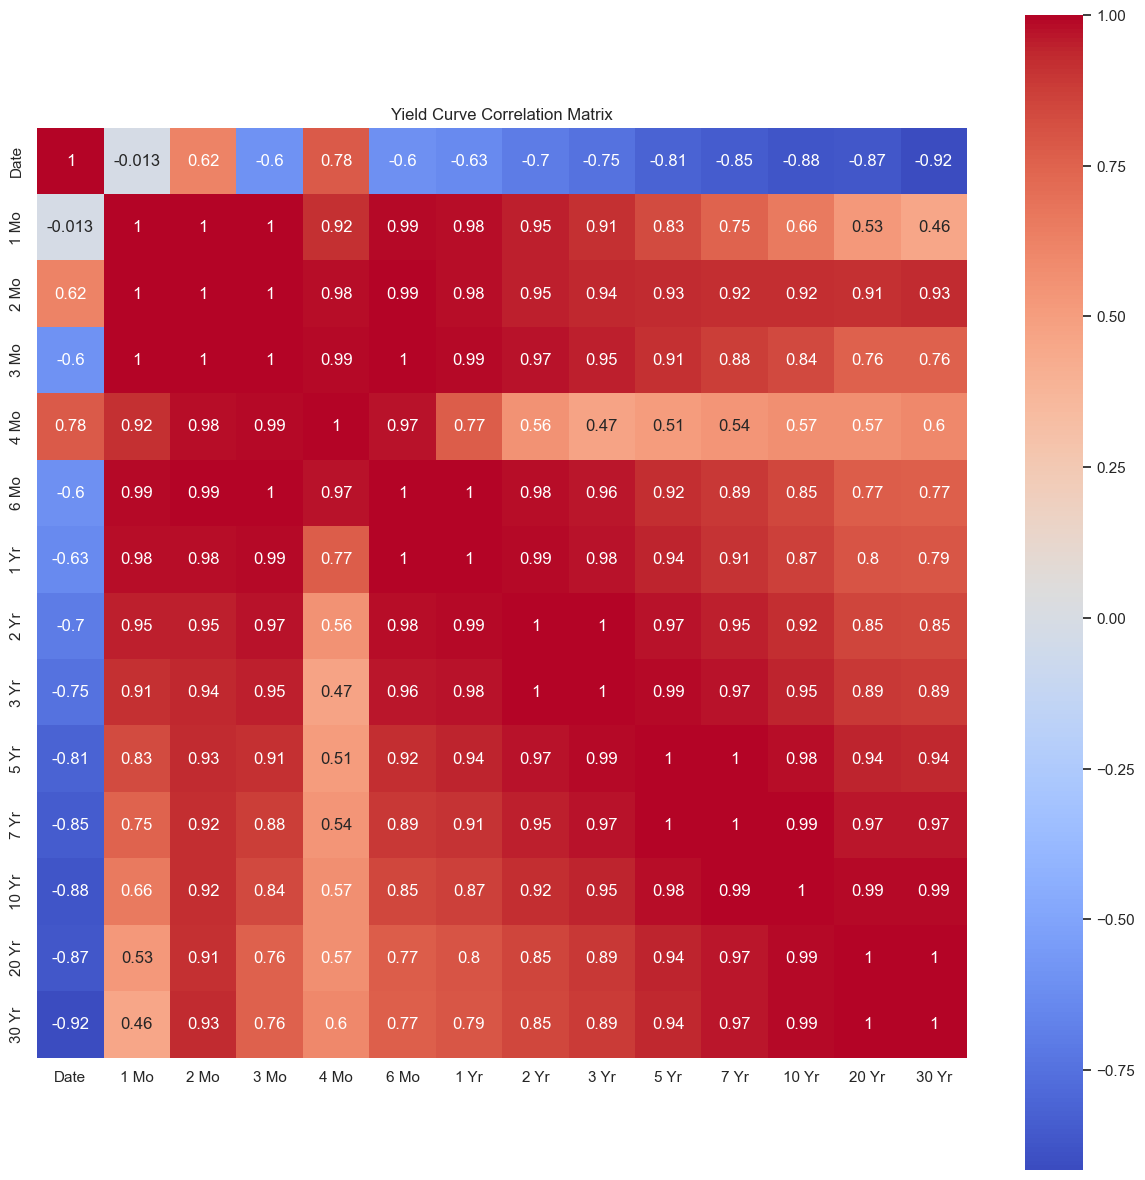

In [4]:
correlation = df_par_rates_lt_adj.corr()
plt.figure(figsize=(15, 15))
plt.title("Yield Curve Correlation Matrix")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="coolwarm")

In [5]:
df_par_rates_copy = df_par_rates_lt_adj.copy()
# removing 20s for now - use spline and historical pricing to interpolate missing period of 20s
df_par_rates_copy = df_par_rates_copy[["Date", "6 Mo", "1 Yr", "2 Yr", "3 Yr", "5 Yr", "7 Yr", "10 Yr", "20 Yr", "30 Yr"]] 
df_par_rates_copy = df_par_rates_copy[df_par_rates_copy["Date"] > datetime(1993, 10, 1)]
df_par_rates_copy = df_par_rates_copy.set_index("Date")
df_par_rates_copy = df_par_rates_copy.dropna()
df_par_rates_copy

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
2024-06-18,5.37,5.09,4.69,4.43,4.24,4.22,4.22,4.47,4.36
2024-06-17,5.39,5.11,4.75,4.50,4.30,4.28,4.28,4.52,4.40
2024-06-14,5.36,5.07,4.67,4.41,4.22,4.20,4.20,4.46,4.34
2024-06-13,5.36,5.07,4.68,4.42,4.24,4.23,4.24,4.50,4.40
2024-06-12,5.38,5.13,4.75,4.48,4.32,4.31,4.31,4.56,4.47
...,...,...,...,...,...,...,...,...,...
1993-10-08,3.16,3.33,3.78,4.09,4.61,4.96,5.26,6.02,5.92
1993-10-07,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01
1993-10-06,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01


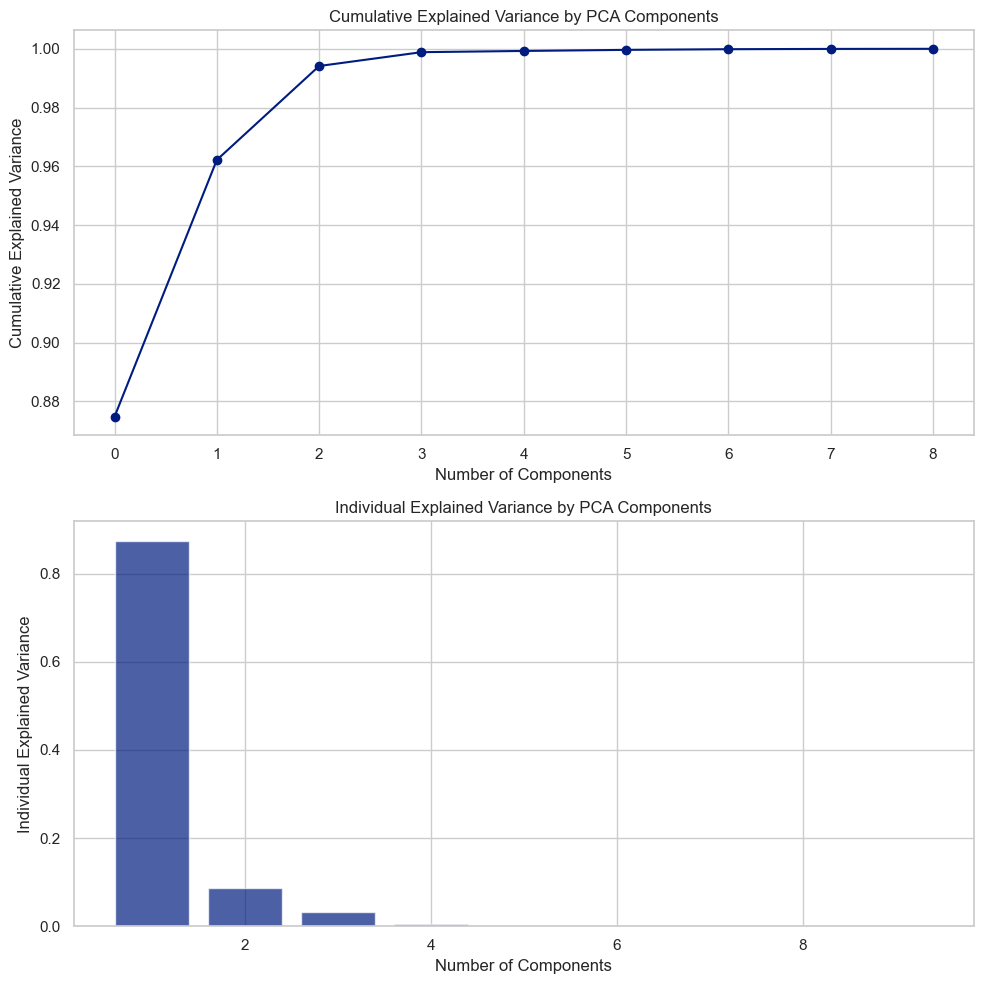

[[Timestamp('2023-01-29 00:00:00')], [Timestamp('2023-02-05 00:00:00')], [Timestamp('2023-02-19 00:00:00')], [Timestamp('2023-02-26 00:00:00')], [Timestamp('2023-03-05 00:00:00')], [Timestamp('2023-04-02 00:00:00')], [Timestamp('2023-04-16 00:00:00')], [Timestamp('2023-04-23 00:00:00')], [Timestamp('2023-05-14 00:00:00')], [Timestamp('2023-05-21 00:00:00')], [Timestamp('2023-05-28 00:00:00')], [Timestamp('2023-06-18 00:00:00')], [Timestamp('2023-06-25 00:00:00')], [Timestamp('2023-07-02 00:00:00')], [Timestamp('2023-07-23 00:00:00')], [Timestamp('2023-08-27 00:00:00')], [Timestamp('2023-09-10 00:00:00')], [Timestamp('2023-11-12 00:00:00')], [Timestamp('2023-11-26 00:00:00')], [Timestamp('2023-12-10 00:00:00')], [Timestamp('2024-01-21 00:00:00')], [Timestamp('2024-02-18 00:00:00')], [Timestamp('2024-03-31 00:00:00')], [Timestamp('2024-04-14 00:00:00')], [Timestamp('2024-05-12 00:00:00')], [Timestamp('2024-05-26 00:00:00')], [Timestamp('2024-06-23 00:00:00')]]
[[Timestamp('2023-01-29 00:

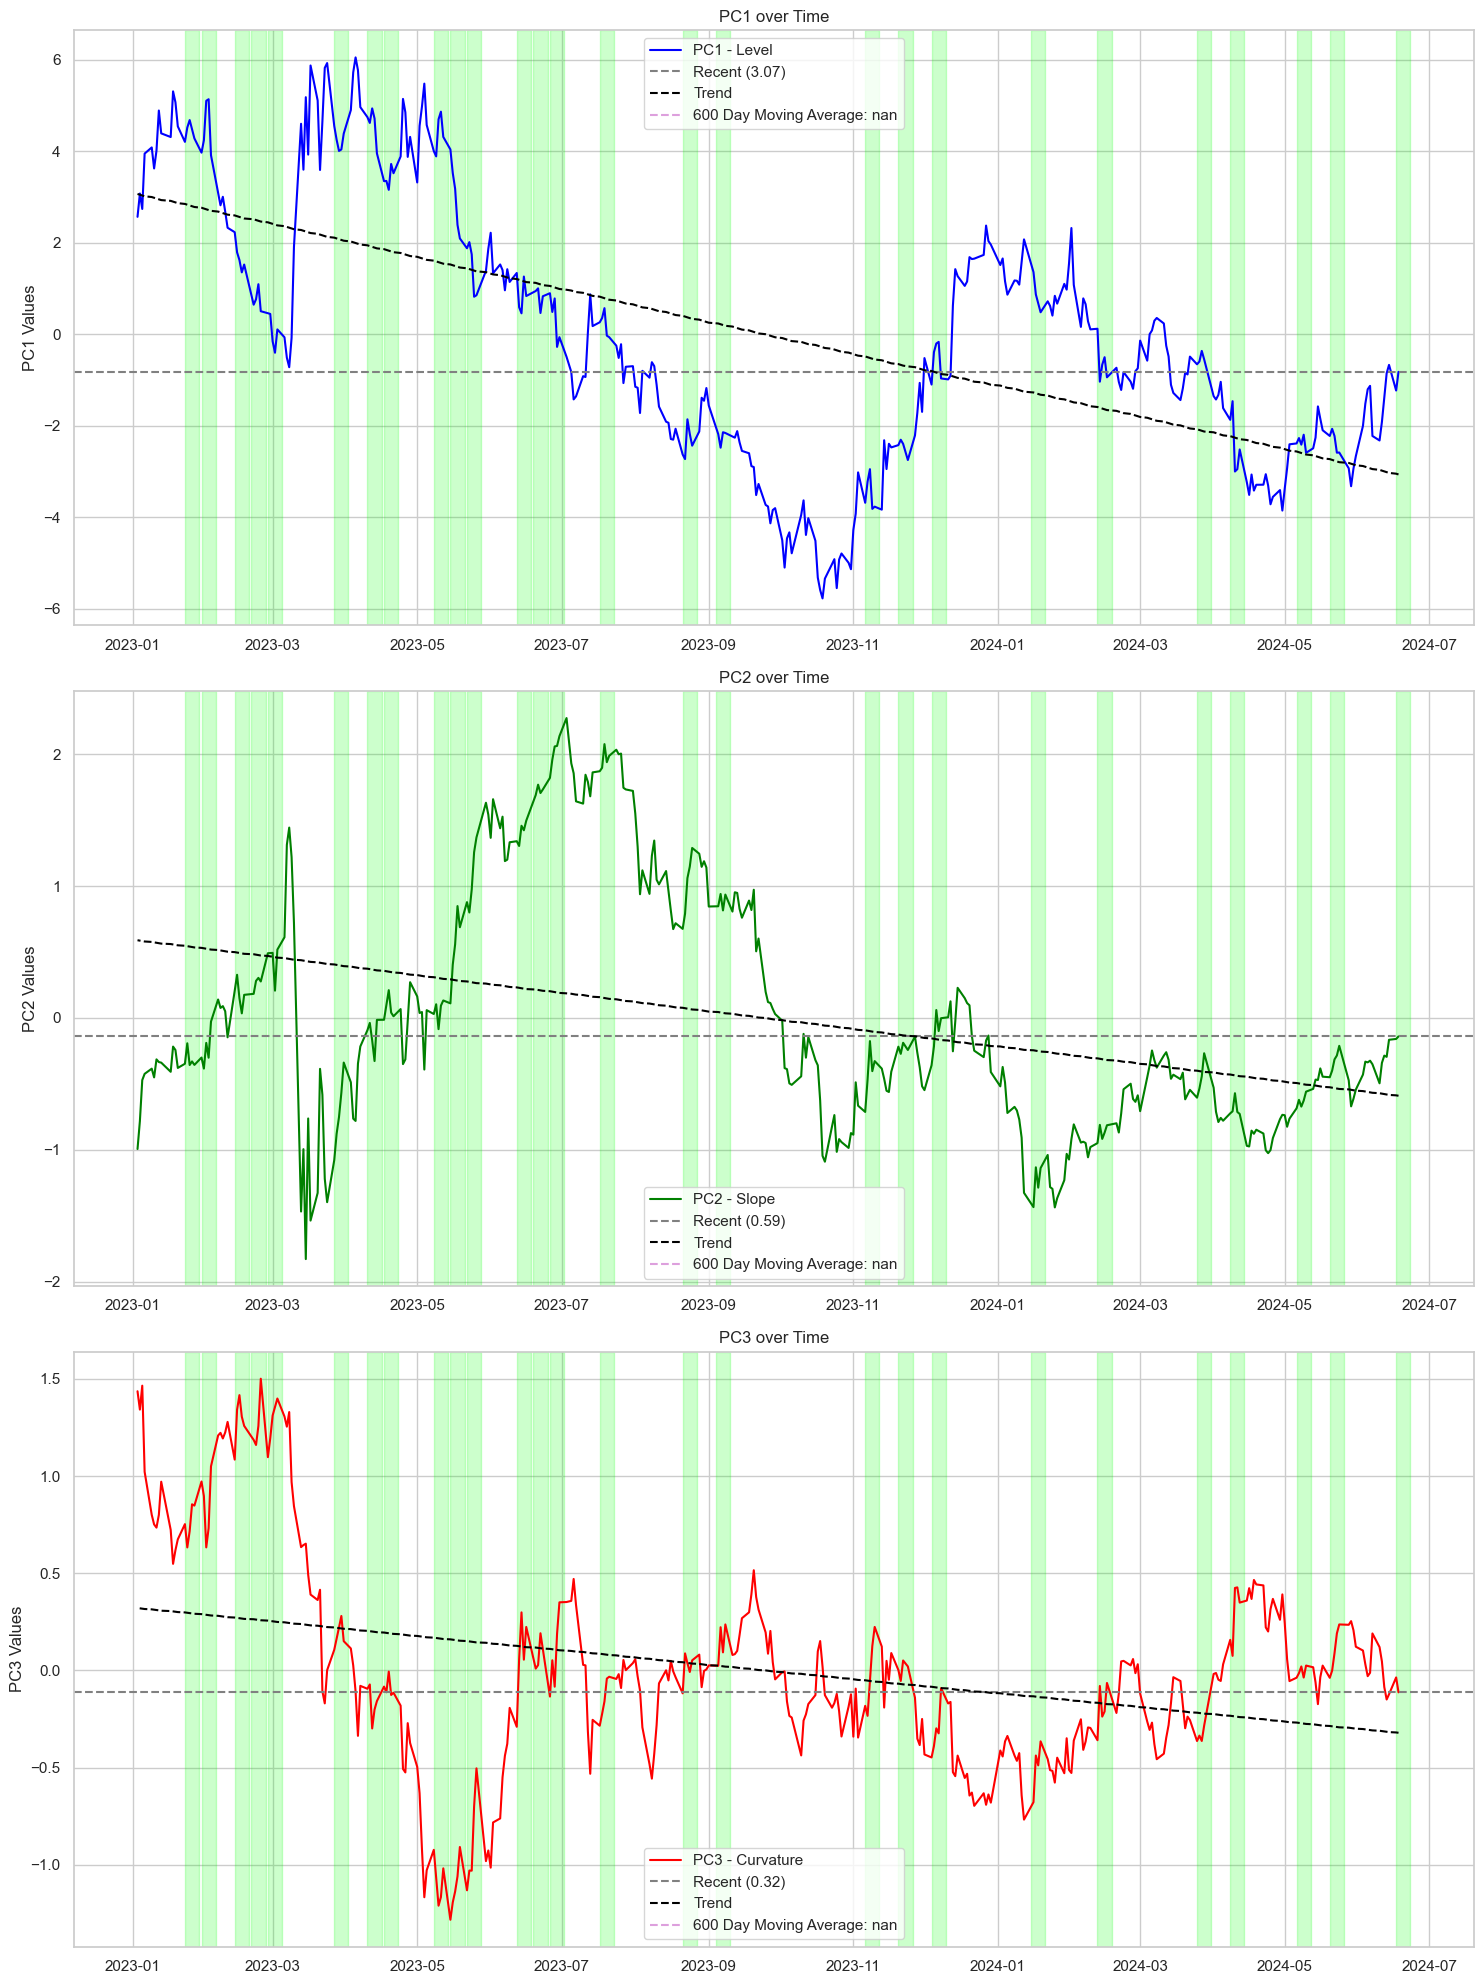

In [26]:
run_pca_yield_curve(
    df=df_par_rates_copy,
    date_subset_range=[datetime(2024, 6, 18), datetime(2023, 1, 1)],
    show_cum_ex_var=True,
    show_most_recent=True,
    show_trend=True,
    window=600,
    curve_analysis_resampling_window="W",
    show_bull_steepening_periods=True,
    show_recessions=True,
)

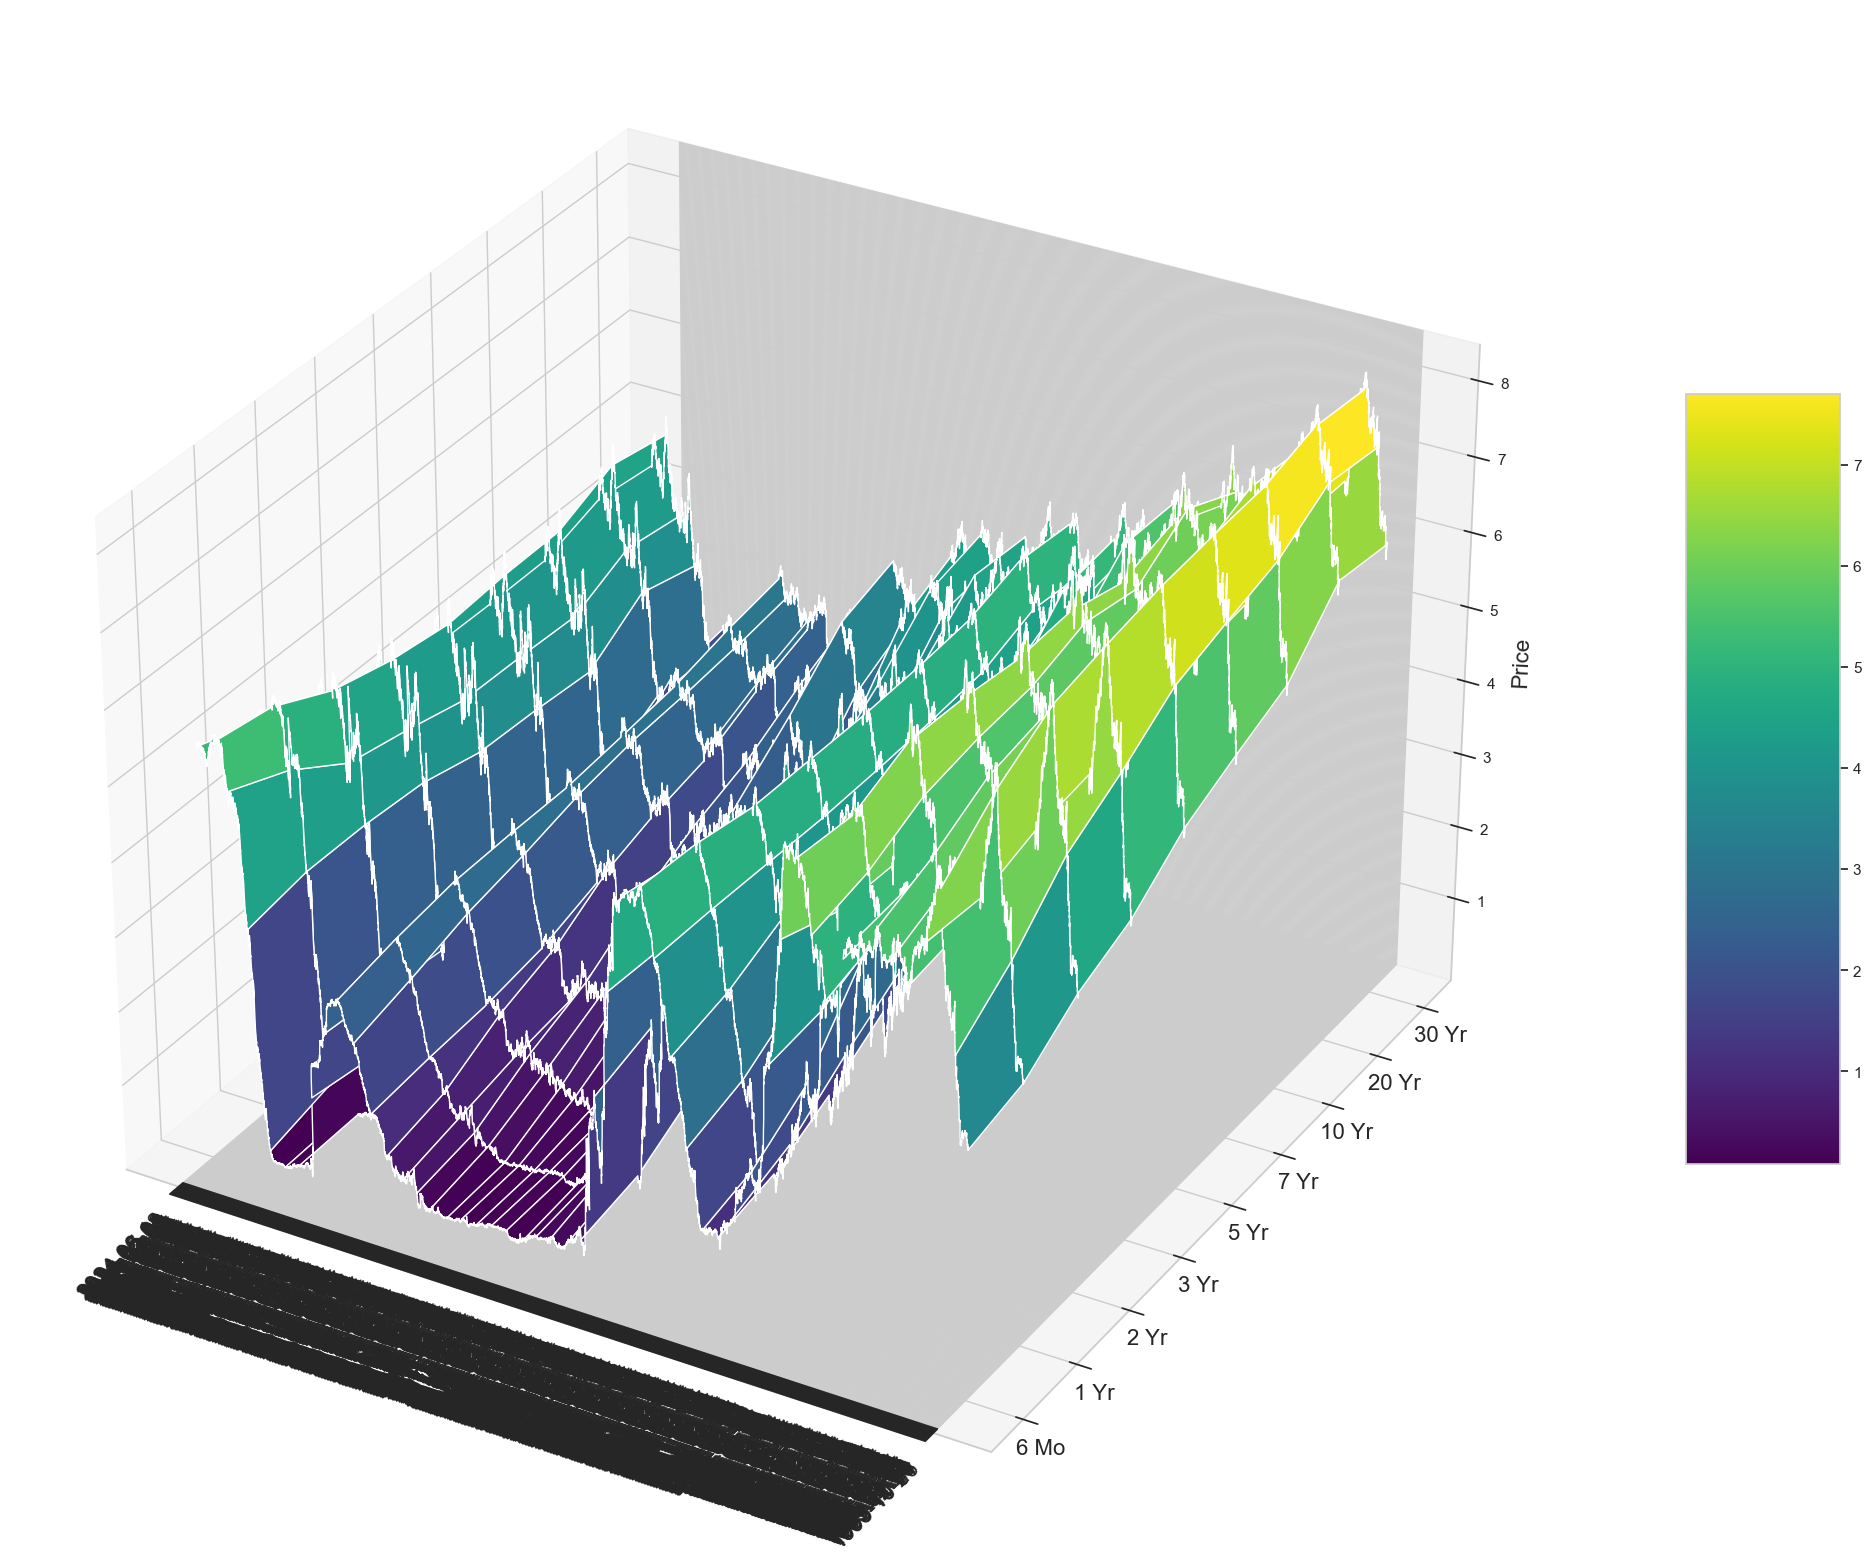

In [10]:
date_indices = np.arange(len(df_par_rates_copy.index))
contracts = df_par_rates_copy.columns[0:20]
contract_indices = np.arange(len(contracts))
prices = df_par_rates_copy[contracts]

X, Y = np.meshgrid(date_indices, contract_indices)
Z = prices.T.values  

fig = plt.figure(figsize=(35, 20))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_zlabel('Price', fontsize=16)

ax.set_yticks(contract_indices)
ax.set_yticklabels(contracts, fontsize=16)

selected_dates = df_par_rates_copy.index.strftime('%Y-%m-%d')
ax.set_xticks(date_indices[::10])  
ax.set_xticklabels(selected_dates[::10], rotation=45, ha='right', fontsize=16)

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()